In [6]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from autoviz import AutoViz_Class
%matplotlib inline


Imported v0.1.903. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [7]:
BASE_DIR = os.getcwd()

In [8]:
np.random.seed(42)
n_rows = 1000


dsp = np.random.randint(0, 76, n_rows)
fan_speed = np.random.randint(0, 100, n_rows)


base_eth = np.random.randint(45, 61, n_rows)


humidity = 75 + 0.1 * dsp + np.random.normal(0, 5, n_rows)
humidity = np.clip(humidity, 0, 100)

temperature = 25 - 0.2 * dsp + np.random.normal(0, 3, n_rows)
temperature = np.clip(temperature, 0, 60)

daily_sun_exposure = 18 - 0.05 * dsp + np.random.normal(0, 1, n_rows)
daily_sun_exposure = np.clip(daily_sun_exposure, 12, 19)

water_ph_level = 5.8 + 0.01 * dsp + np.random.normal(0, 0.5, n_rows)
water_ph_level = np.clip(water_ph_level, 0, 14)

nutrient = 2 - 0.01 * dsp + np.random.normal(0, 0.3, n_rows)
nutrient = np.clip(nutrient, 0, 4)

sun_exposure_intensity = 10609 - 50 * dsp + np.random.normal(0, 1000, n_rows)
sun_exposure_intensity = np.clip(sun_exposure_intensity, 800, 100000)

visible_light_wavelength = 655 + 0.5 * dsp + np.random.normal(0, 10, n_rows)
visible_light_wavelength = np.clip(visible_light_wavelength, 380, 741)

temperature_deviation = 25 - 0.2 * dsp + np.random.normal(0, 3, n_rows)
temperature_deviation = np.clip(temperature_deviation, 0, 60)

humidity_deviation = 75 + 0.1 * dsp + np.random.normal(0, 5, n_rows)
humidity_deviation = np.clip(humidity_deviation, 0, 100)

# Adjusting ETH based on generated parameters
eth_adjustments = (0.05 * humidity / 100) + \
                  (0.05 * abs((sun_exposure_intensity - 32000) / (100000 - 32000))) + \
                  (0.1 * (temperature > 30)) + \
                  (0.1 * abs((daily_sun_exposure - 18) / (18 - 12))) + \
                  (0.1 * abs((water_ph_level - 5.8) / 14)) + \
                  (0.1 * abs((nutrient - 2) / 3)) + \
                  (0.05 * abs((visible_light_wavelength - 650) / (740 - 380))) + \
                  (0.1 * abs((temperature_deviation - 25) / 60)) + \
                  (0.05 * (humidity_deviation / 100)) + \
                  (-0.01 * (fan_speed / 100))

adjusted_eth = base_eth + (base_eth * eth_adjustments)
adjusted_eth = np.clip(adjusted_eth, 45, None)

# Creating a DataFrame with the fake data
fake_df = pd.DataFrame({
    'Day since planted': dsp,
    'Humidity (%)': humidity,
    'Temperature (°C)': temperature,
    'Daily Sun Exposure (hours)': daily_sun_exposure,
    'Water pH Level': water_ph_level,
    'Nutrient Level': nutrient,
    'Sun Exposure Intensity (Lux)': sun_exposure_intensity,
    'Visible Light Wavelength (nm)': visible_light_wavelength,
    'Temperature Deviation (°C)': temperature_deviation,
    'Humidity Deviation (%)': humidity_deviation,
    'Fan Speed (%)': fan_speed,
    'ETH (days)': np.round(adjusted_eth, 2)
})

# Display the first few rows of the fake dataset
fake_df.head()

Day since planted  Humidity (%)  Temperature (°C)  \
0         51            83.689952       17.546251      
1         14            84.777737       25.420134      
2         71            90.498958       10.125499      
3         60            84.674468       17.876402      
4         20            74.082938       20.199289      

   Daily Sun Exposure (hours)  Water pH Level  Nutrient Level  \
0           14.944951             6.233558        1.455700      
1           18.573674             5.565112        2.156441      
2           16.461826             5.954081        0.654108      
3           13.630863             6.777834        1.770263      
4           16.311168             6.048899        1.700933      

   Sun Exposure Intensity (Lux)  Visible Light Wavelength (nm)  \
0           8019.916887                   674.587504             
1          11177.377954                   667.620628             
2           7695.318445                   683.882002             
3           8110.169935                   687.733669             
4          10384.646493                   652.481570             

   Temperature Deviation (°C)  Humidity Deviation (%)  Fan Speed (%)  \
0           17.133002                 85.983500             70         
1           19.525085                 77.310478             51         
2            8.604024                 94.379482             69         
3           11.356372                 83.193661             87         
4           23.583254                 83.348895             32         

   ETH (days)  
0     62.76    
1     67.16    
2     68.80    
3     64.04    
4     55.57

Shape of your Data Set loaded: (1000, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0']

################ Regression problem ################

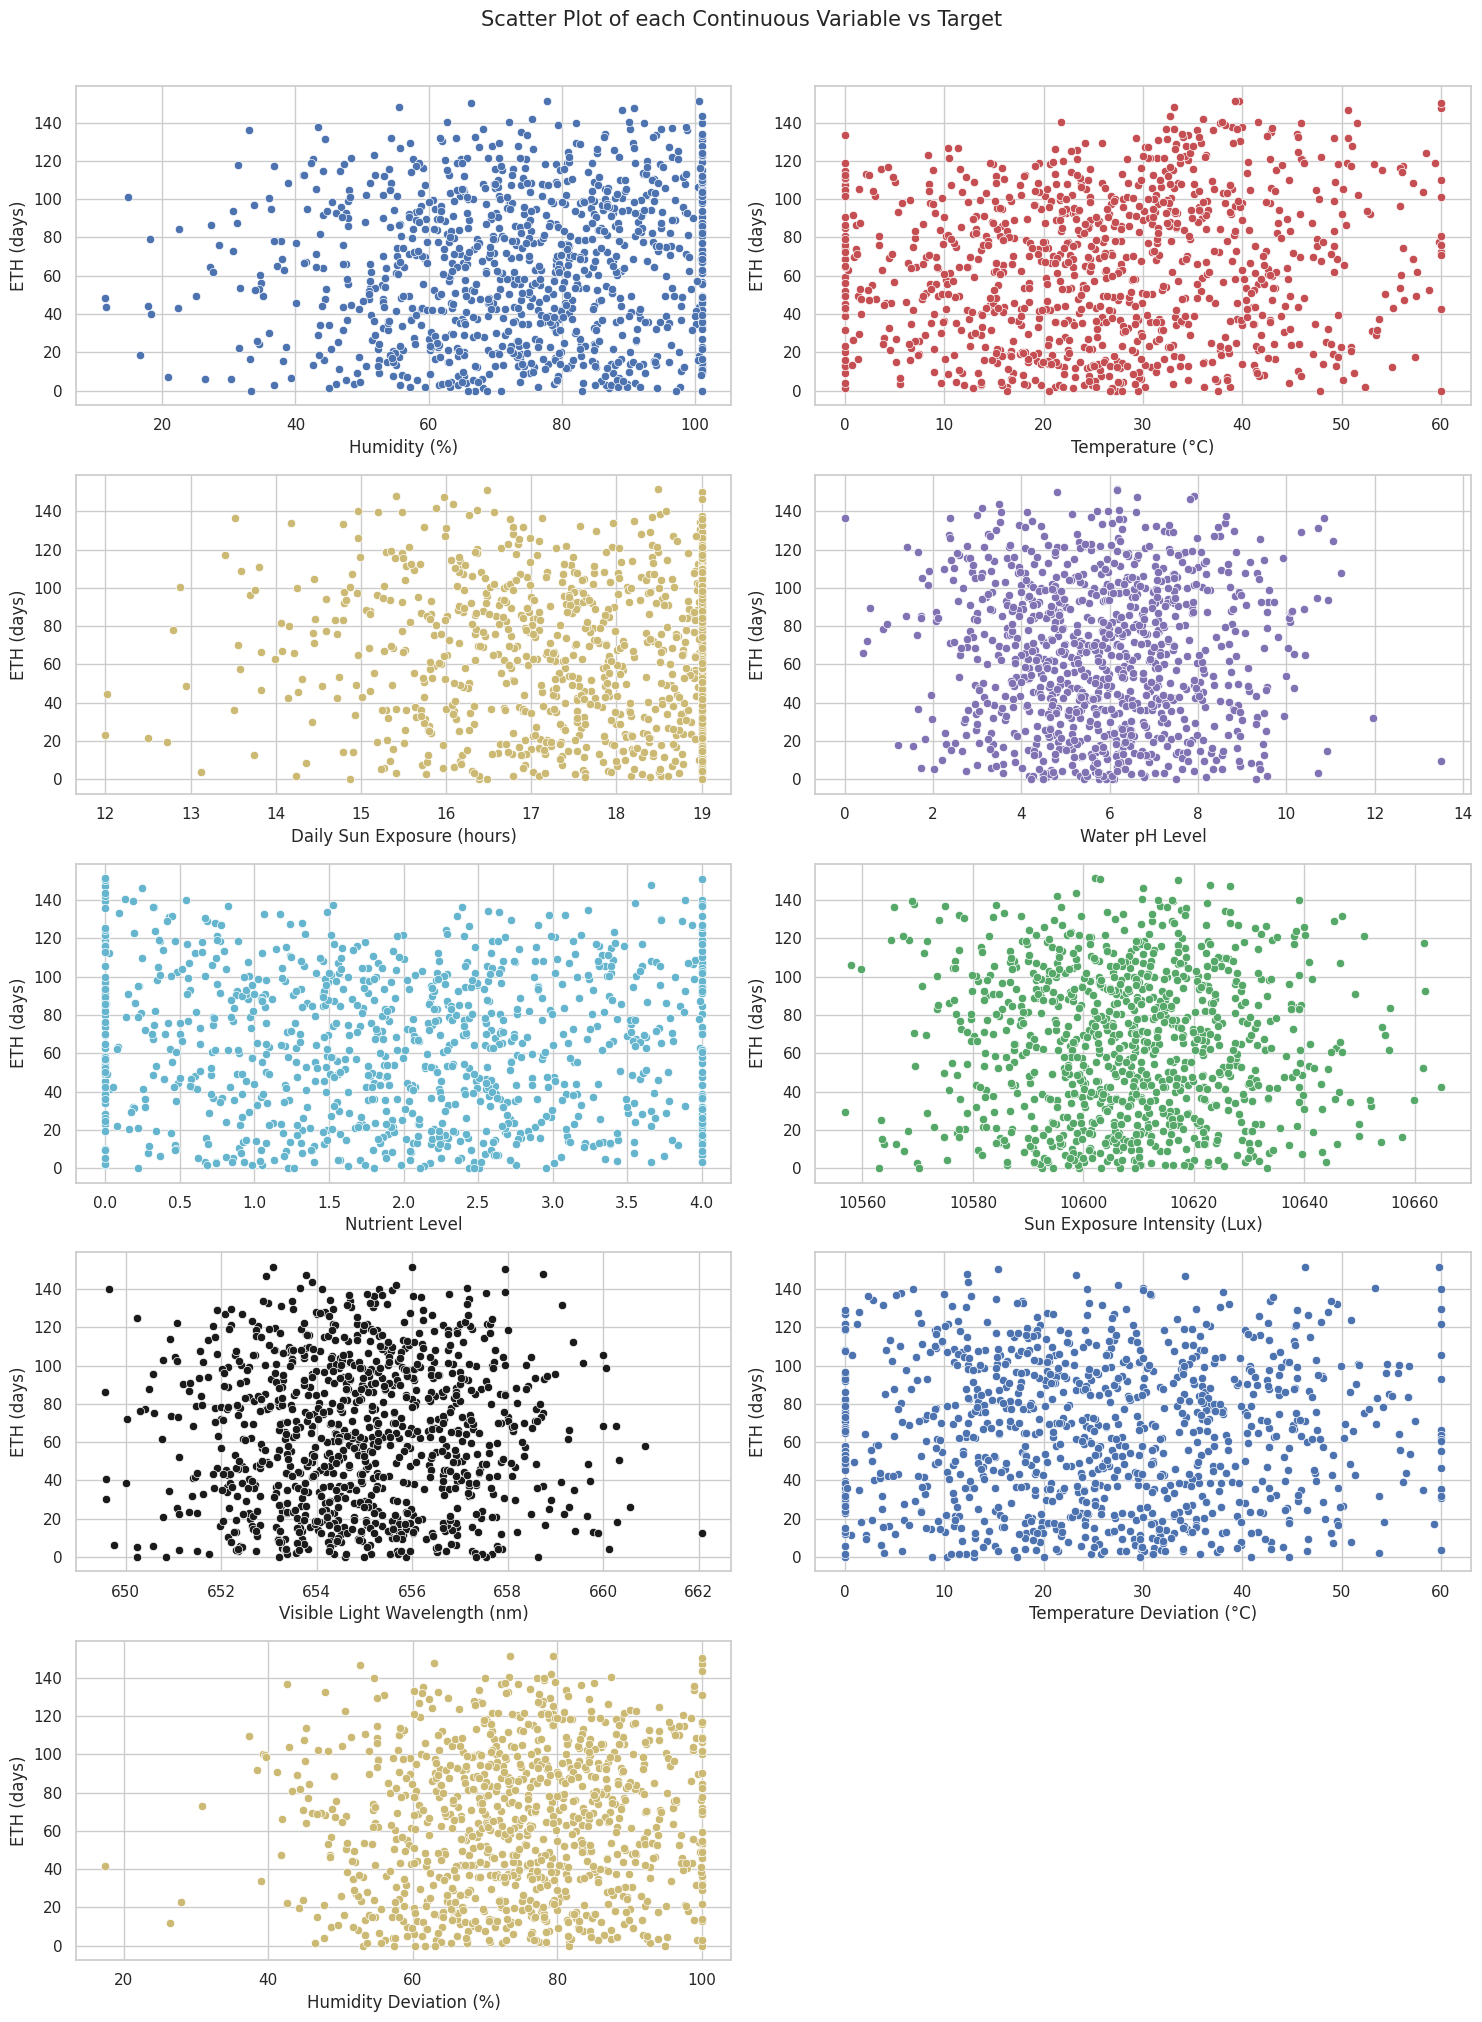

Number of All Scatter Plots = 45


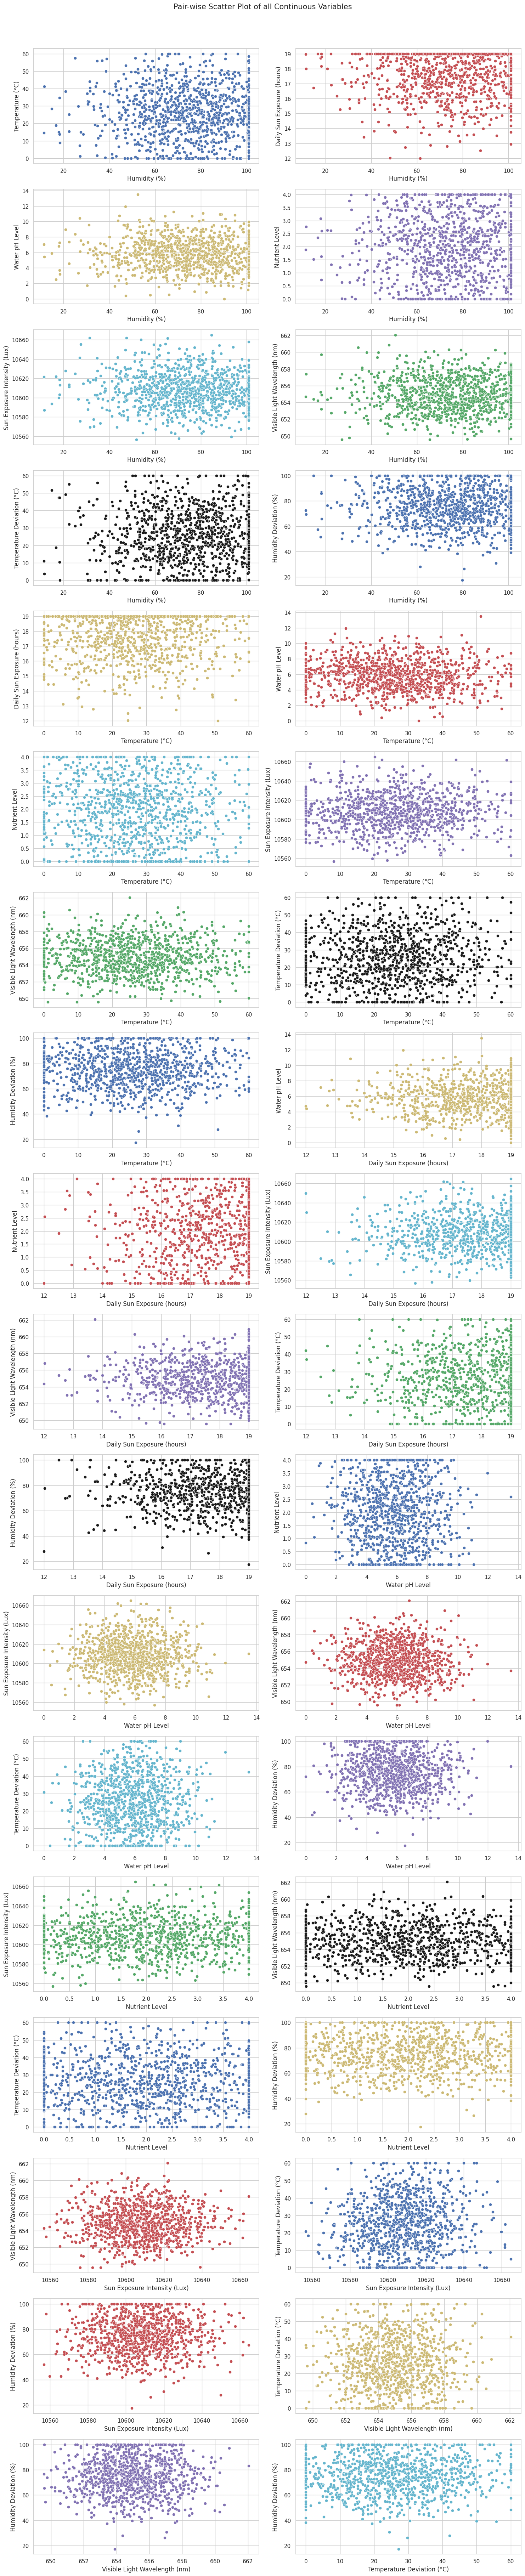

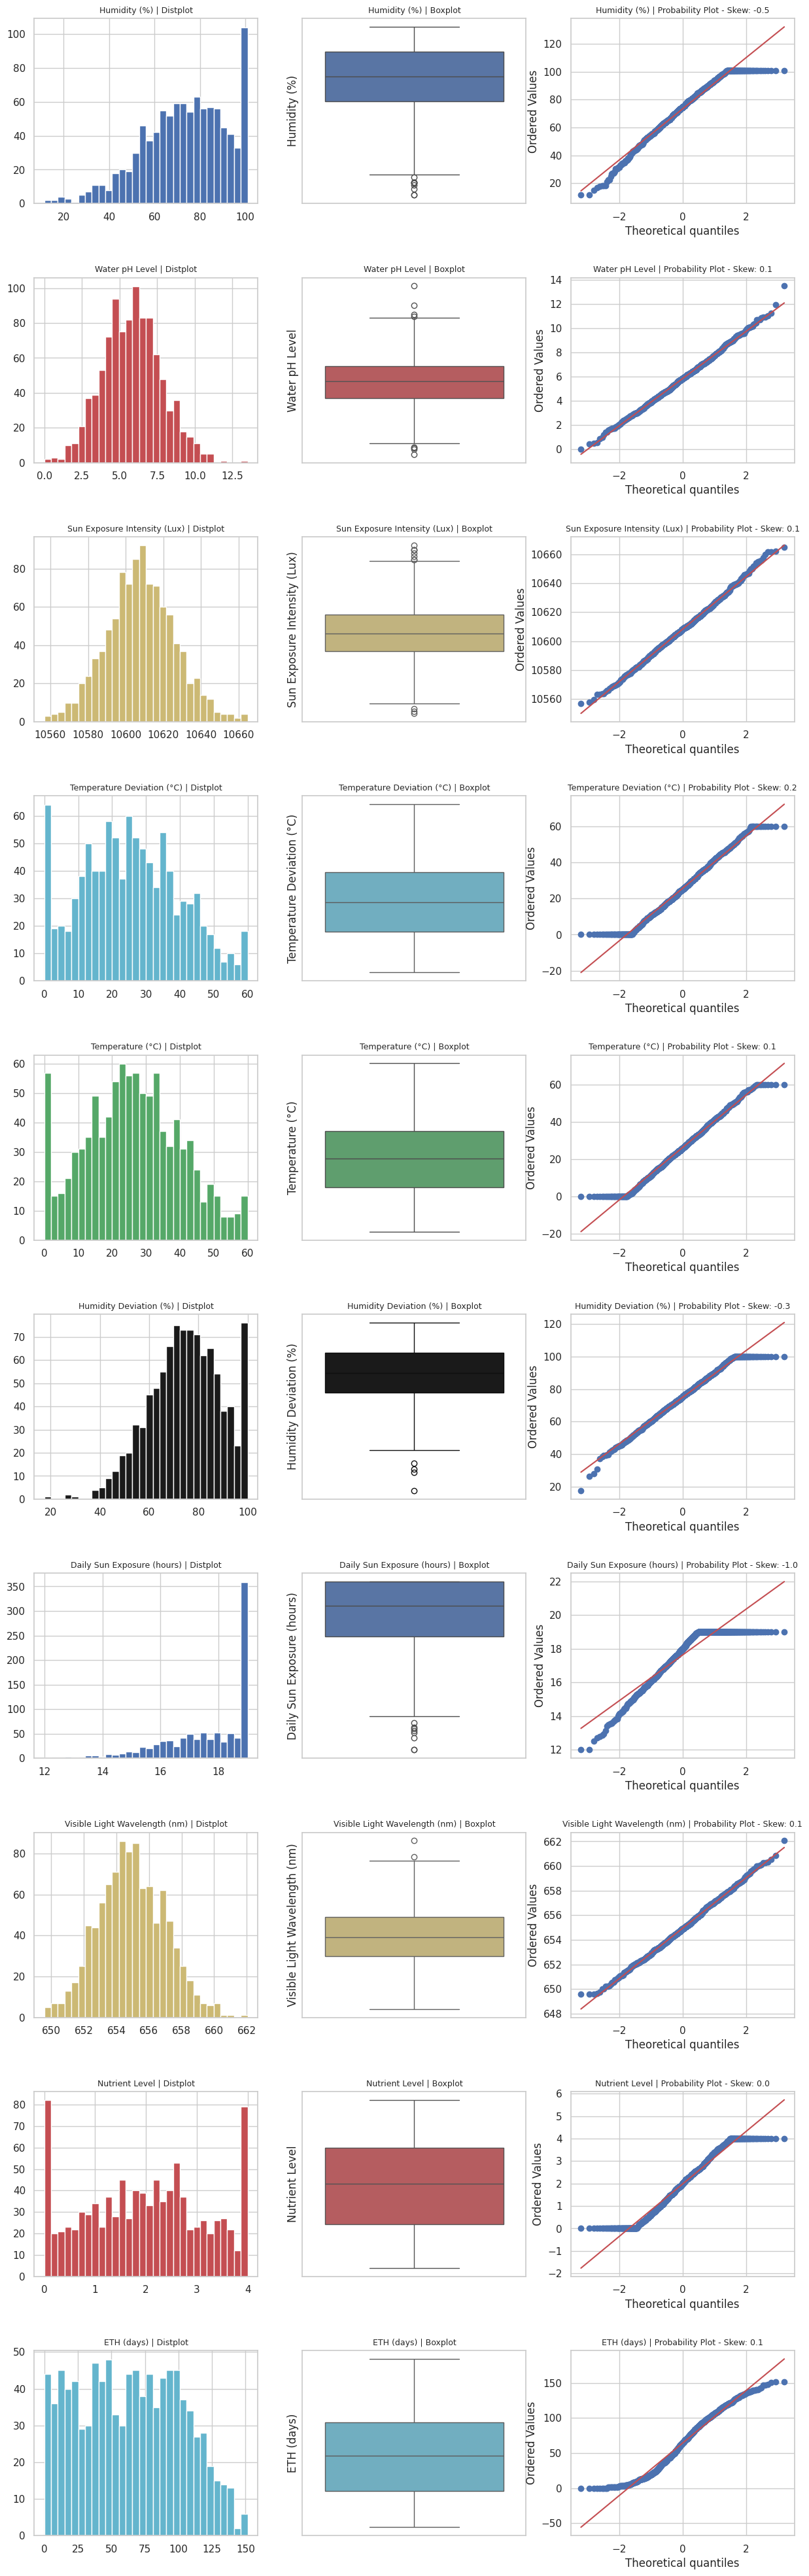

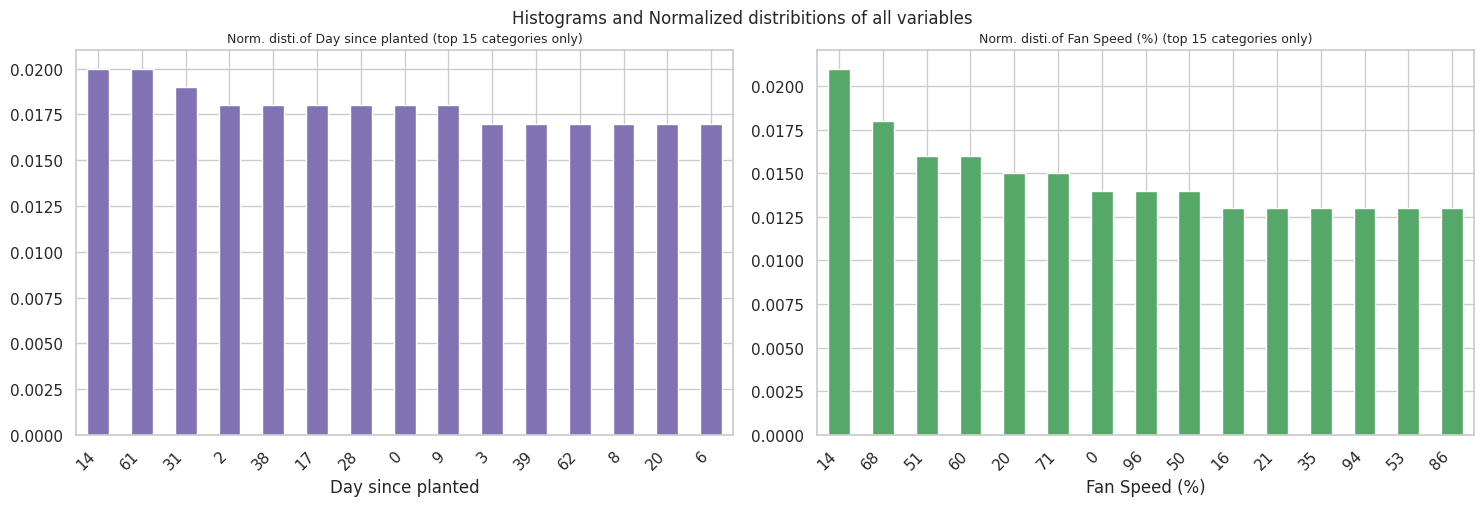

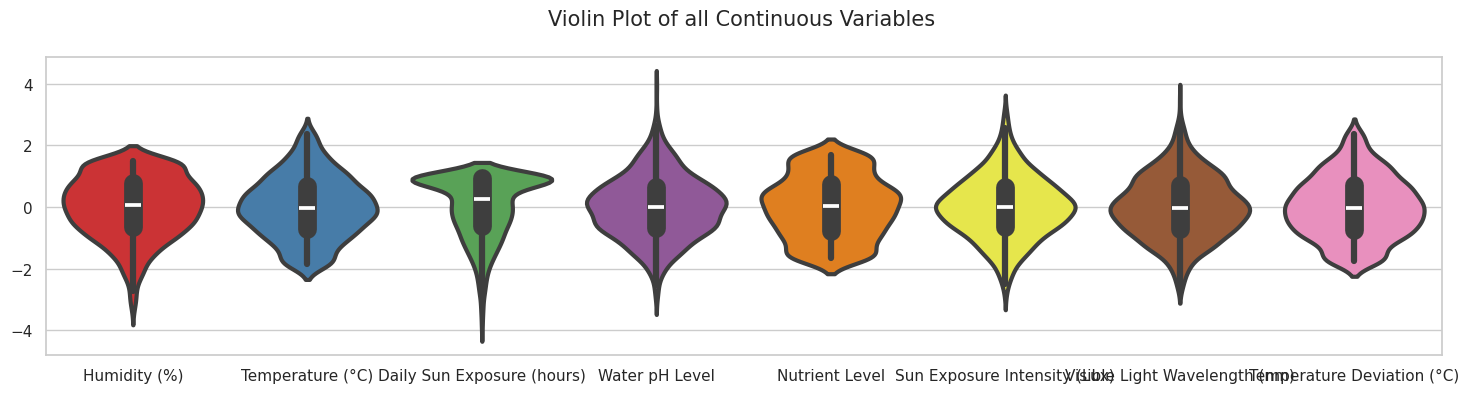

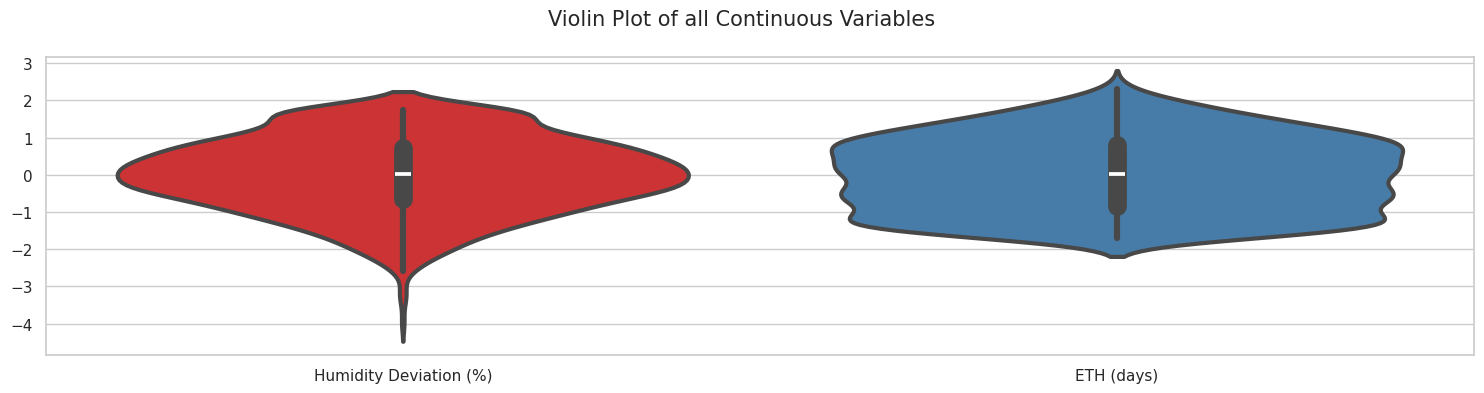

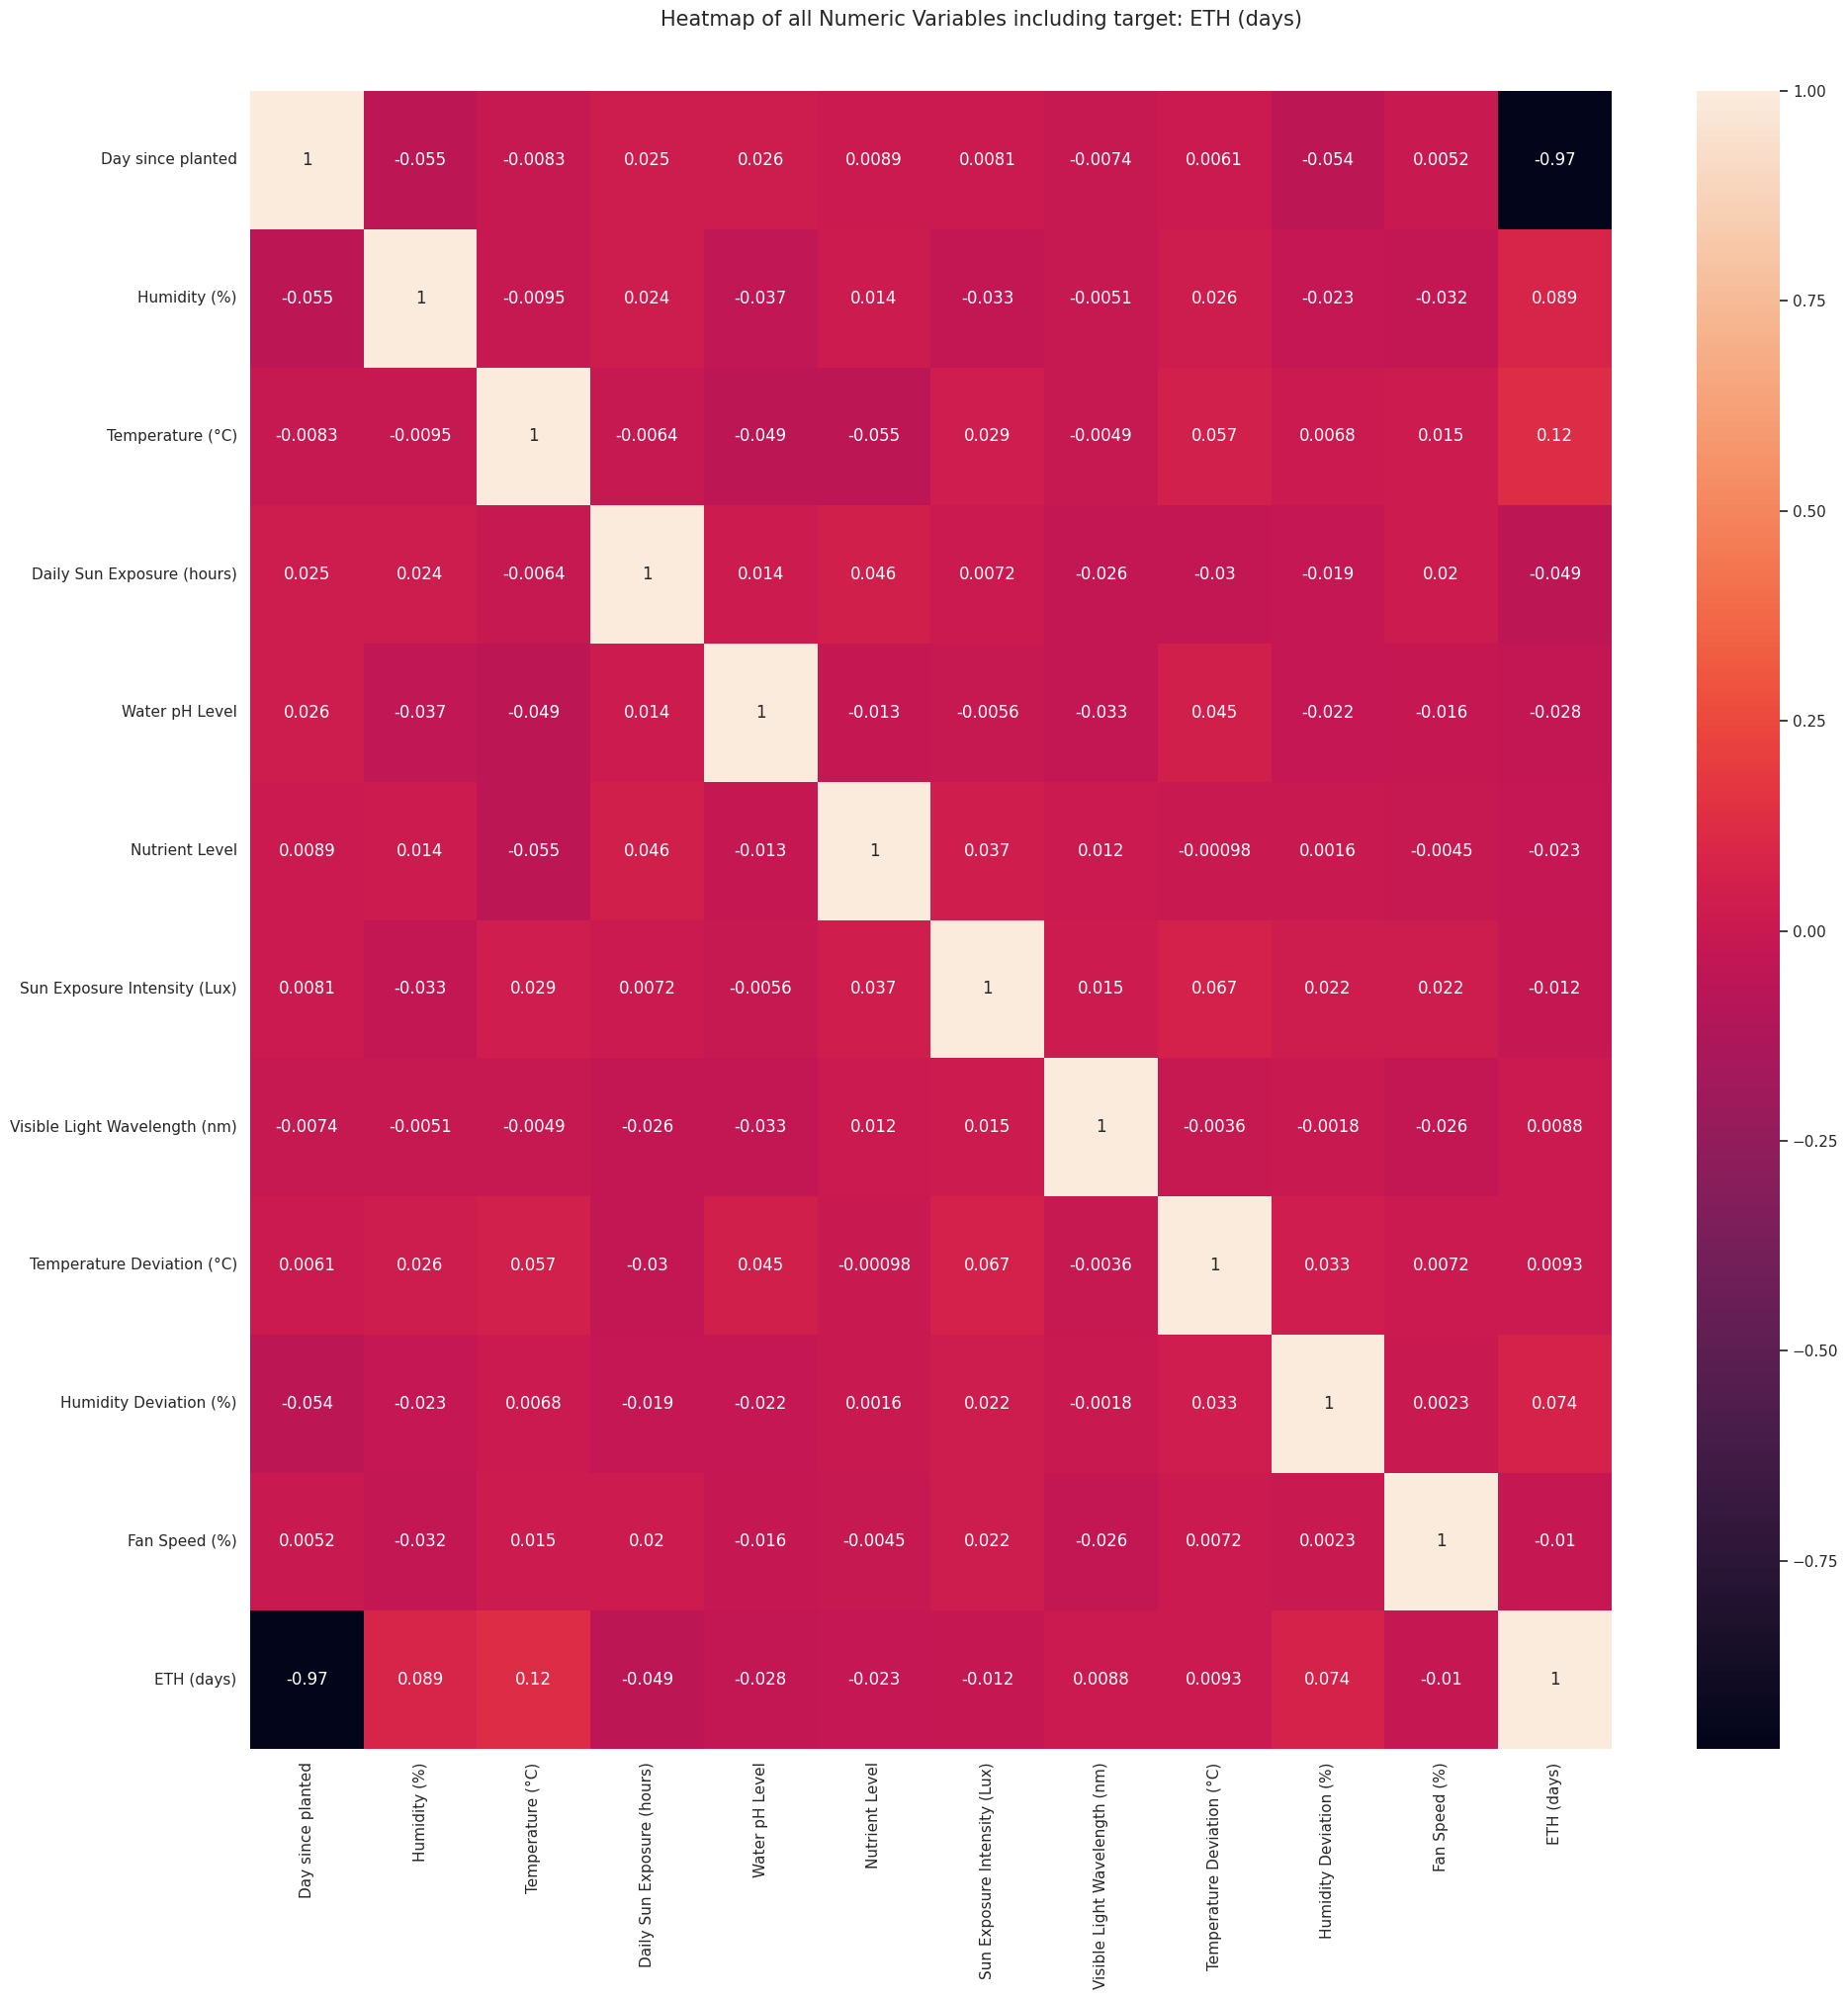

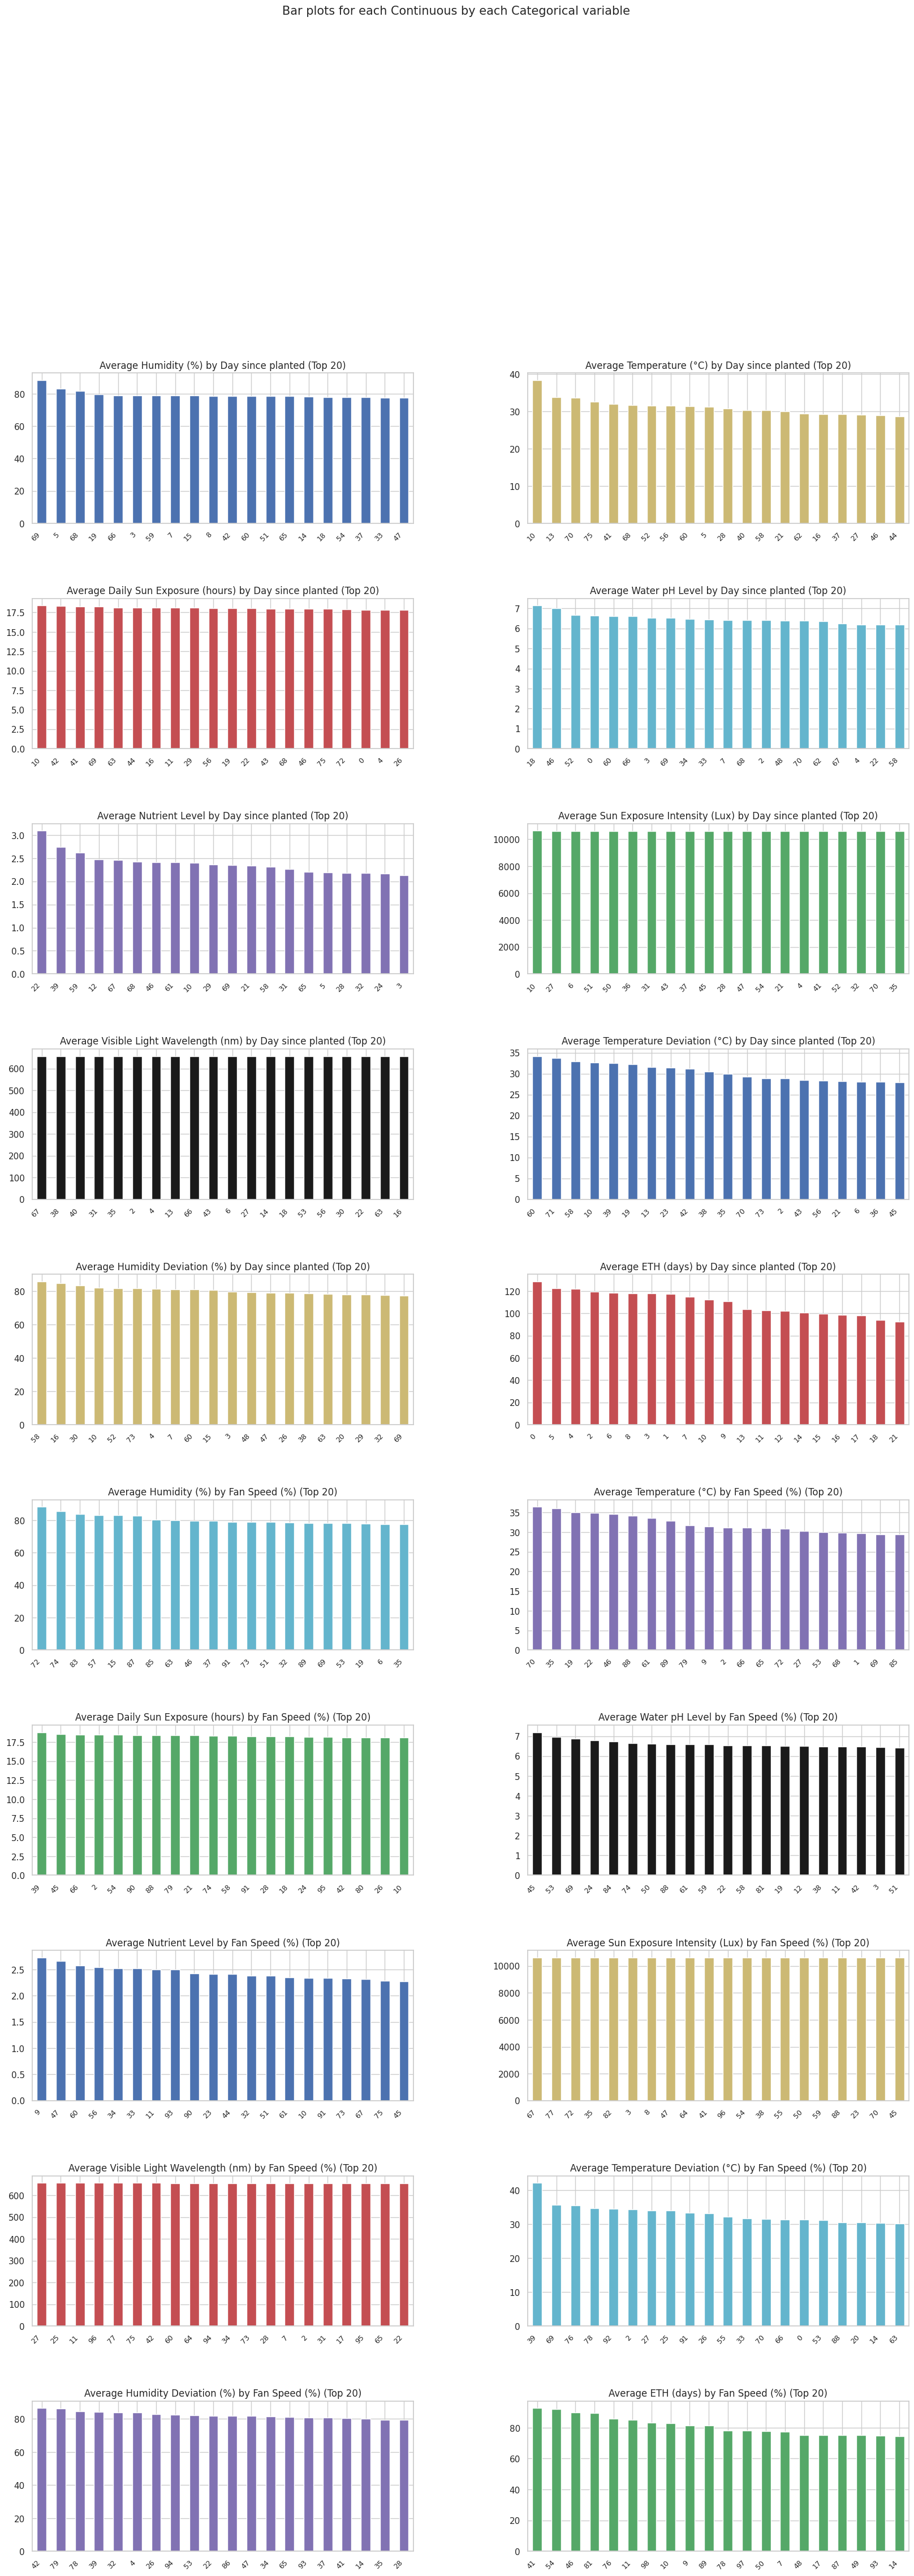

All Plots done
Time to run AutoViz = 22 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [9]:

AV = AutoViz_Class()
target_variable = 'ETH (days)'
#dft = AV.AutoViz(BASE_DIR + '/fake_df.csv')
filename = BASE_DIR + '/fake_df.csv'
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=None,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)